# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Linear Regression_Intro

Topics:
1. Visualize the relationship among the features and the target variables
2. Apply Linear and Multiple Linear Regression
3. Hypothesis Testing
4. Feature Selection
5. Handling Categorical Predictors

# Part.1 - Import data & EDA

In [2]:
# import Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
df = pd.read_csv('Advertising.csv')
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [4]:
df.shape



(200, 4)

In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.info()
#df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


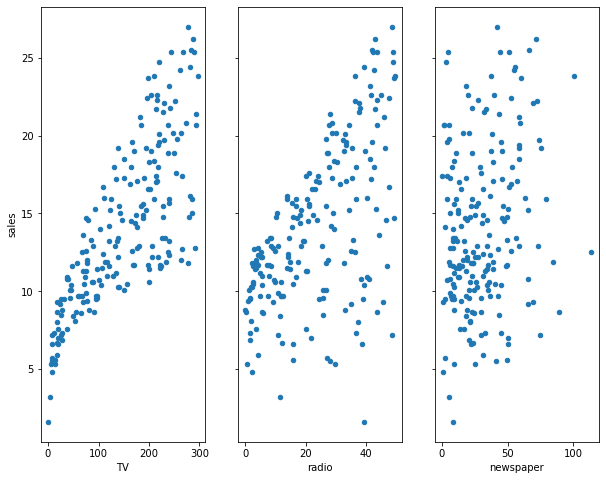

In [12]:
# using matplot
fig,axs = plt.subplots(1,3, sharey=True, figsize=(10,8))
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0])
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

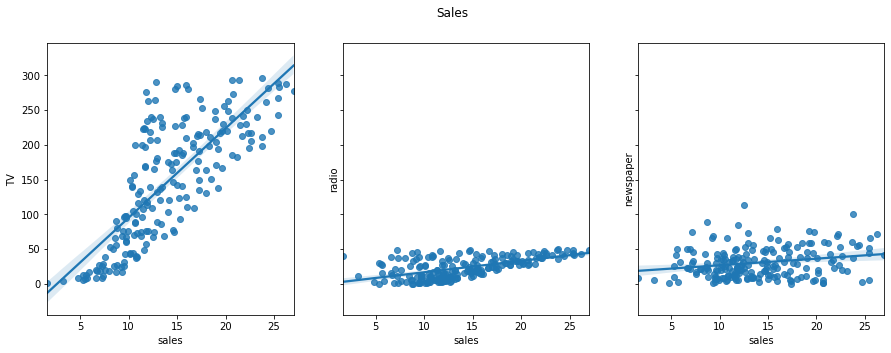

In [5]:
# using seaborn
cols = ['TV', 'radio', 'newspaper']
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales')

for i in range(3):
    sns.regplot(ax=axes[i], x=df.sales, y=df[cols[i]])



In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


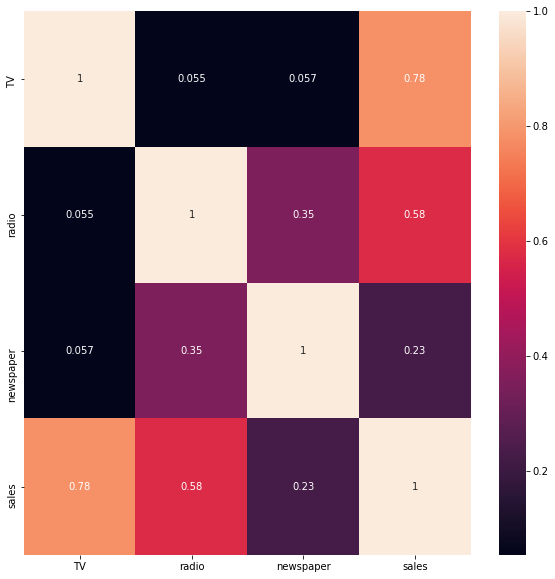

In [17]:
fig_size = (6, 4)
fig, ax = plt.subplots(figsize=(10,10) )


sns.heatmap(df.corr(),  ax=ax, annot=True)

# Part.2-  Linear Regression with One variable

In [18]:
features_cols = ['TV']
target_cols = ['sales']

X = df[features_cols]
y = df[target_cols]

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print("m:", model.coef_)
print("c:", model.intercept_)

m: [[0.04753664]]
c: [7.03259355]


In [22]:
# Prediction
X_new = pd.DataFrame({'TV':[50,75,100]})
X_new.head() 

,TV
0,50
1,75
2,100


In [23]:
model.predict(X_new)

array([[ 9.40942557],
       [10.59784158],
       [11.78625759]])

In [11]:
X_new=pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]}, index=['min', 'max'])
X_new.head()

,TV
min,0.7
max,296.4


In [12]:
predict = model.predict(X_new)
predict

array([[ 7.0658692 ],
       [21.12245377]])

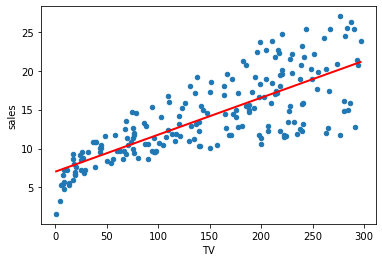

In [13]:
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, predict, c='red', lw=2)

Looking at the plot we can say that we have high bias and low variance model. Using the null hypothesis, let us assume that there is no relation between TV and sales and we test this Null hypothesis. We shall reject null hypothesis, if 95% coonfidence interval does not include Zero. The P value represents the possibility that the coefficient is actually Zero. 

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales~TV', data = df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [15]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Conclusion:
In this case, the P value for TV is far less than 0.05 and hence we can infer that there is a relationship between TV adds and sales.

Evaluation of model:
The most common way to evaluate the overall fit for for the linear model is by R2 value [i.e  R squared ].


In [16]:
lm.rsquared

0.611875050850071

R squared for the above model is 0.6. Does it indicae good or bad model. It is difficult to answer.
R value varies between 0 to 1.
0 means bad and 1 means good.

# Part.3- Linear Regression using all variables

In [17]:
features_cols = ['TV', 'radio', 'newspaper']
target_cols = ['sales']

X = df[features_cols]
y = df[target_cols]


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [19]:
model = LinearRegression()
model.fit(X,y)

print("m:", model.coef_)
print("c:", model.intercept_)

m: [[ 0.04576465  0.18853002 -0.00103749]]
c: [2.93888937]


In [20]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("m:", model.coef_)
print("c:", model.intercept_)

m: [[0.04405928 0.1992875  0.00688245]]
c: [2.70894909]


In [21]:
# Test the model

y_preds = model.predict(X_test)




In [22]:
from sklearn.metrics import r2_score

In [23]:
# Testing Accuracy
r2_score(y_test,y_preds)

0.8609466508230368

In [24]:
#Training Accuracy ???
model.score(X,y)

0.8938708191740676

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(y_test,y_preds)
np.sqrt(mean_squared_error(y_test,y_preds))

1.9485372043446383

In [26]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='sales~TV + radio + newspaper', data = df).fit()
lm.conf_int()


,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        17:59:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P values for TV and radio are significant and is Not for newspaper.
So we reject null hypothesis for TV and radio. it implies that there is no assosiation between newspaper and sales.


TV and radio are +vely assosiated with sales, whereas newspaper is slightly -vely assosiated with sales

This model has ahigher R squared value than the previous model. This means this has a better fit.



How to decide suitable features?
1. Check for p value
2. Test the Rsquared for different features

Rsqured always increases when more features are added, even if they are not assosiated.

# Part.4 

In [28]:
lm = smf.ols(formula='sales~TV', data = df).fit()
lm.rsquared

0.611875050850071

In [29]:
lm = smf.ols(formula='sales~TV + radio', data = df).fit()
lm.rsquared

0.8971942610828956

In [30]:
lm = smf.ols(formula='sales~TV + newspaper', data = df).fit()
lm.rsquared

0.6458354938293271

# Part.5 

In [31]:
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(df))
mask_large = nums>0.5

df['Size'] ='small'
df.loc[mask_large, 'Size'] = 'large'
df.head()

,TV,radio,newspaper,sales,Size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,small
4,180.8,10.8,58.4,12.9,large


In [36]:
df['IsLarge'] = df.Size.map({'small':0, 'large':1})
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
 4   Size       200 non-null    object 
 5   IsLarge    200 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


part.1
feature_cols = ['TV', 'radio', 'newspaper', 'Islarge']
target_cols = ['sales']
X = df[feature_cols]
y = df[target_cols]


model = LinearRegression()
model.fit(X,y)

zip(features_cols, model.coef_)


Part.2

np.random.seed(123456)
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 066) 
mask_urban = nums > 0.66
df['Area'] =['rural]
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban, 'Area'] = 'Urban'
df.head()


Part.3
area_dummies = pd.get_dummies(df.Area, prefix='Area').iloc[:,1:]

df = pd.concat([df, area_dummies], axis=1)
df.head()



Part.4
feature_cols = ['TV', 'radio', 'newspaper', 'Islarge', 'Area_suburban', 'Area_urban']

target_cols = ['sales']
X = df[feature_cols]
y = df[target_cols]

model = LinearRegression()
model.fit(X,y)

print(feature_cols, model.coef_)

